In [2]:
# 데이터 전처리
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 기계학습 모델(군집화) 생성, 학습, 평가
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 시각화 & 편의용
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams['axes.unicode_minus'] = False

#차원축소
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA 

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

In [3]:
loan_data = pd.read_csv('loan_data.csv')

In [4]:
'''#명목 독립 변수 인덱스 구분
category_feature = [col for col in loan_data.columns if loan_data[col].dtype == "object"]
category_feature.append('COMB_COMM')
print(category_feature)

numerical_feature = list(set(loan_data.columns) - set(category_feature) - set(['TARGET']))
print(numerical_feature)'''

'#명목 독립 변수 인덱스 구분\ncategory_feature = [col for col in loan_data.columns if loan_data[col].dtype == "object"]\ncategory_feature.append(\'COMB_COMM\')\nprint(category_feature)\n\nnumerical_feature = list(set(loan_data.columns) - set(category_feature) - set([\'TARGET\']))\nprint(numerical_feature)'

In [5]:
'''log_list = list(set(numerical_feature)-set(['AGE','MOBILE_PRICE','INCOME','CRDT_CNT']))
log_list
# 치우친것 로그 트랜스폼
for i in log_list:
    loan_data[i]= np.log1p(loan_data[i])'''

"log_list = list(set(numerical_feature)-set(['AGE','MOBILE_PRICE','INCOME','CRDT_CNT']))\nlog_list\n# 치우친것 로그 트랜스폼\nfor i in log_list:\n    loan_data[i]= np.log1p(loan_data[i])"

In [6]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43386 entries, 0 to 43385
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AGE            43386 non-null  int64  
 1   TOT_LOAN       43386 non-null  int64  
 2   TOT_LOAN_CRD   43386 non-null  int64  
 3   LOAN_BNK       43386 non-null  int64  
 4   LOAN_CPT       43386 non-null  int64  
 5   CRDT_CNT       43386 non-null  int64  
 6   GUARN_CNT      43386 non-null  int64  
 7   INCOME         43386 non-null  int64  
 8   LOAN_CRD_CNT   43386 non-null  int64  
 9   LATE_RATE      43386 non-null  int64  
 10  LATE_RATE_1Y   43386 non-null  int64  
 11  INS_MON_MAX    43386 non-null  float64
 12  CANCEL_CNT_1Y  43386 non-null  int64  
 13  CALL_TIME      43386 non-null  float64
 14  TEL_COST_MON   43386 non-null  int64  
 15  MOBILE_PRICE   43386 non-null  int64  
 16  SUSP_DAY       43386 non-null  int64  
 17  LATE_TEL       43386 non-null  int64  
 18  COMB_C

In [7]:
loan_data = pd.get_dummies(loan_data)
loan_data

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,...,SEX_F,SEX_M,PAY_METHOD_A,PAY_METHOD_B,PAY_METHOD_C,PAY_METHOD_D,JOB_A,JOB_B,JOB_C,JOB_D
0,40,6,6,6,0,0,0,4500,0,16,...,0,1,1,0,0,0,1,0,0,0
1,35,9,9,0,0,1,0,3700,0,9,...,0,1,0,0,1,0,0,1,0,0
2,55,9,9,0,0,0,0,6400,0,1,...,0,1,0,0,1,0,0,1,0,0
3,55,42,0,42,0,5,0,8900,0,13,...,0,1,0,1,0,0,0,0,1,0
4,40,36,36,36,0,3,1,0,0,2,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43381,50,63,63,0,0,0,0,4200,0,3,...,0,1,0,0,0,1,0,0,0,1
43382,50,0,0,0,0,1,0,3400,0,0,...,1,0,0,0,0,1,0,0,0,1
43383,45,42,42,0,42,0,0,6300,0,0,...,0,1,0,0,0,1,0,0,0,1
43384,35,0,0,0,0,1,0,4000,0,0,...,1,0,0,0,0,1,0,0,0,1


In [6]:
X = loan_data.drop('TARGET',1)
X

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,...,SEX_F,SEX_M,PAY_METHOD_A,PAY_METHOD_B,PAY_METHOD_C,PAY_METHOD_D,JOB_A,JOB_B,JOB_C,JOB_D
0,40,6,6,6,0,0,0,4500,0,16,...,0,1,1,0,0,0,1,0,0,0
1,35,9,9,0,0,1,0,3700,0,9,...,0,1,0,0,1,0,0,1,0,0
2,55,9,9,0,0,0,0,6400,0,1,...,0,1,0,0,1,0,0,1,0,0
3,55,42,0,42,0,5,0,8900,0,13,...,0,1,0,1,0,0,0,0,1,0
4,40,36,36,36,0,3,1,0,0,2,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43381,50,63,63,0,0,0,0,4200,0,3,...,0,1,0,0,0,1,0,0,0,1
43382,50,0,0,0,0,1,0,3400,0,0,...,1,0,0,0,0,1,0,0,0,1
43383,45,42,42,0,42,0,0,6300,0,0,...,0,1,0,0,0,1,0,0,0,1
43384,35,0,0,0,0,1,0,4000,0,0,...,1,0,0,0,0,1,0,0,0,1


In [9]:
# 데이터 컬럼 단위 정규화 하기
normalizer = StandardScaler()
X = normalizer.fit_transform(X)
X

array([[-0.64485443, -0.59998814, -0.32162562, ..., -0.94783887,
        -0.74947638, -0.31107764],
       [-1.16065713, -0.57631045, -0.2856625 , ...,  1.05503164,
        -0.74947638, -0.31107764],
       [ 0.90255367, -0.57631045, -0.2856625 , ...,  1.05503164,
        -0.74947638, -0.31107764],
       ...,
       [-0.12905173, -0.31585579,  0.10993179, ..., -0.94783887,
        -0.74947638,  3.21463152],
       [-1.16065713, -0.64734354, -0.39355185, ..., -0.94783887,
        -0.74947638,  3.21463152],
       [-2.19226253, -0.57631045, -0.2856625 , ..., -0.94783887,
        -0.74947638,  3.21463152]])

# Hierarchical 겨층적 군집화

## 덴드로그램이랑, theshold 조작인데 이미 정답이 0,1 2cluster라는 것을 알고 하는 거니까 넘어가자

In [ ]:
'''# 모델 정의 
model = AgglomerativeClustering(
    linkage='complete',
    affinity='euclidean',
    distance_threshold=None,
    n_clusters=2)

# 학습
clusters = model.fit_predict(X)'''

In [18]:
linkage_matrix = linkage(X, method='complete', metric='euclidean')

In [19]:
_ = dendrogram(linkage_matrix, color_threshold=5)

Error in callback <function flush_figures at 0x00000288851C93A0> (for post_execute):


KeyboardInterrupt: 

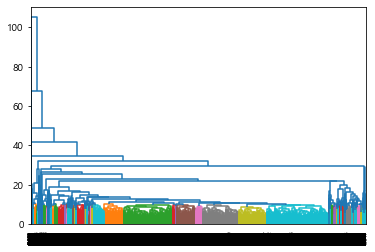

In [20]:
_ = dendrogram(linkage_matrix, color_threshold=10)

## linkage 거리 산출방법 변경

# 정답

In [33]:
y = loan_data['TARGET']

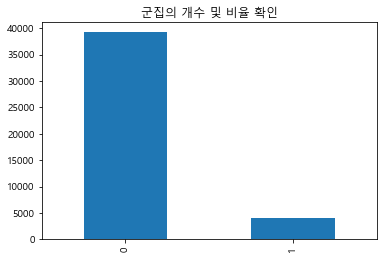

In [34]:
pd.value_counts(y).plot(kind='bar' , title = '군집의 개수 및 비율 확인')
plt.show()

X_:TSNE
X_2:PCA

In [35]:
X_ = TSNE(n_components=2).fit_transform(X)

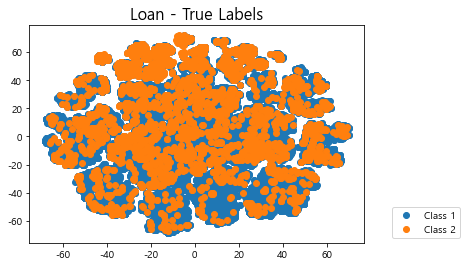

In [36]:
plt.title('Loan - True Labels', fontsize=16)
for c in np.unique(y):
    plt.scatter(X_[y == c,0], X_[y == c,1], label='Class {}'.format(c+1))
plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

In [37]:
X_2 = PCA(n_components=2).fit_transform(X)

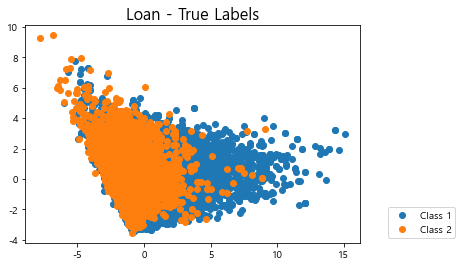

In [38]:
plt.title('Loan - True Labels', fontsize=16)
for c in np.unique(y):
    plt.scatter(X_2[y == c,0], X_2[y == c,1], label='Class {}'.format(c+1))
plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

In [21]:
model = AgglomerativeClustering(
    linkage = 'complete',
    affinity = 'euclidean',
    distance_threshold=None,
    n_clusters=2)

linkage_list = ['single', 'complete', 'average', 'ward']
cluster_results = {}
for _linkage in linkage_list:
    model.linkage = _linkage
    _results = model.fit_predict(X)
    cluster_results[_linkage] = _results


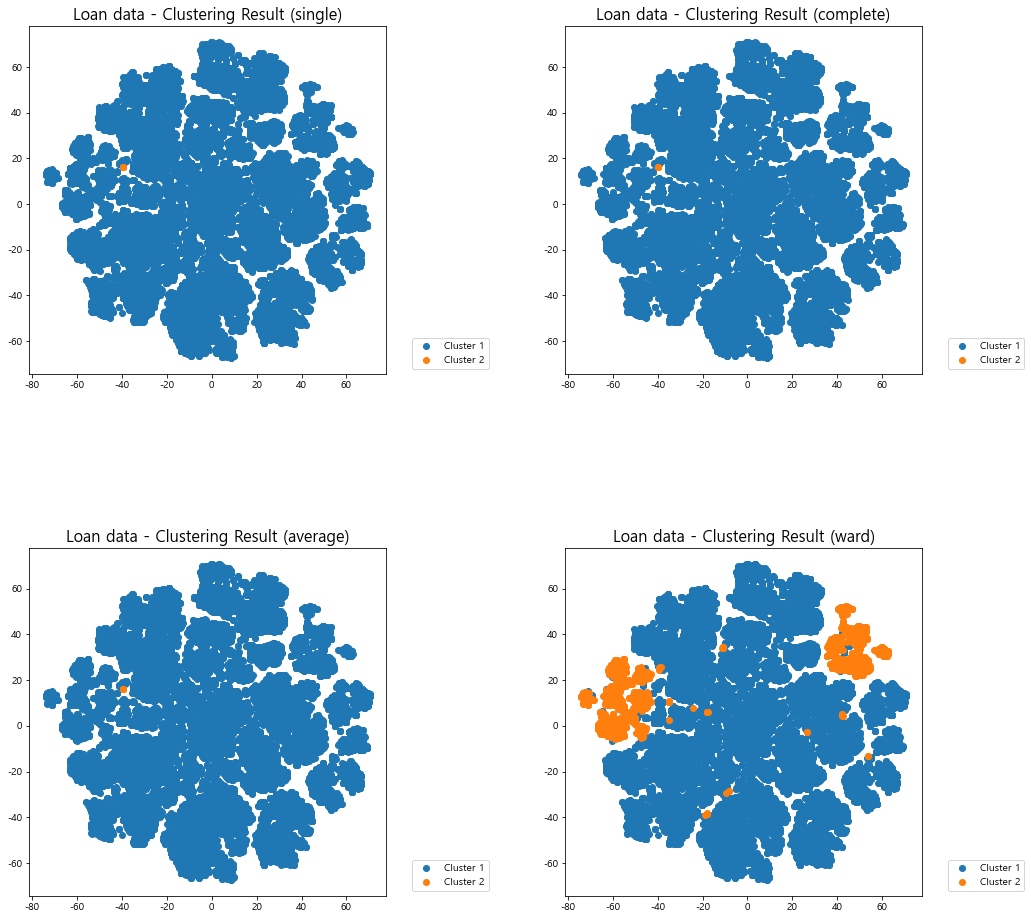

In [23]:
plt.figure(figsize=(16, 16))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _linkage in enumerate(linkage_list):
    plt.subplot(2, 2, i+1)
    plt.title('Loan data - Clustering Result ({})'.format(_linkage), fontsize=16)
    _results = cluster_results[_linkage]
    for c in np.unique(_results):
        plt.scatter(X_[_results == c,0], X_[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))
plt.show()

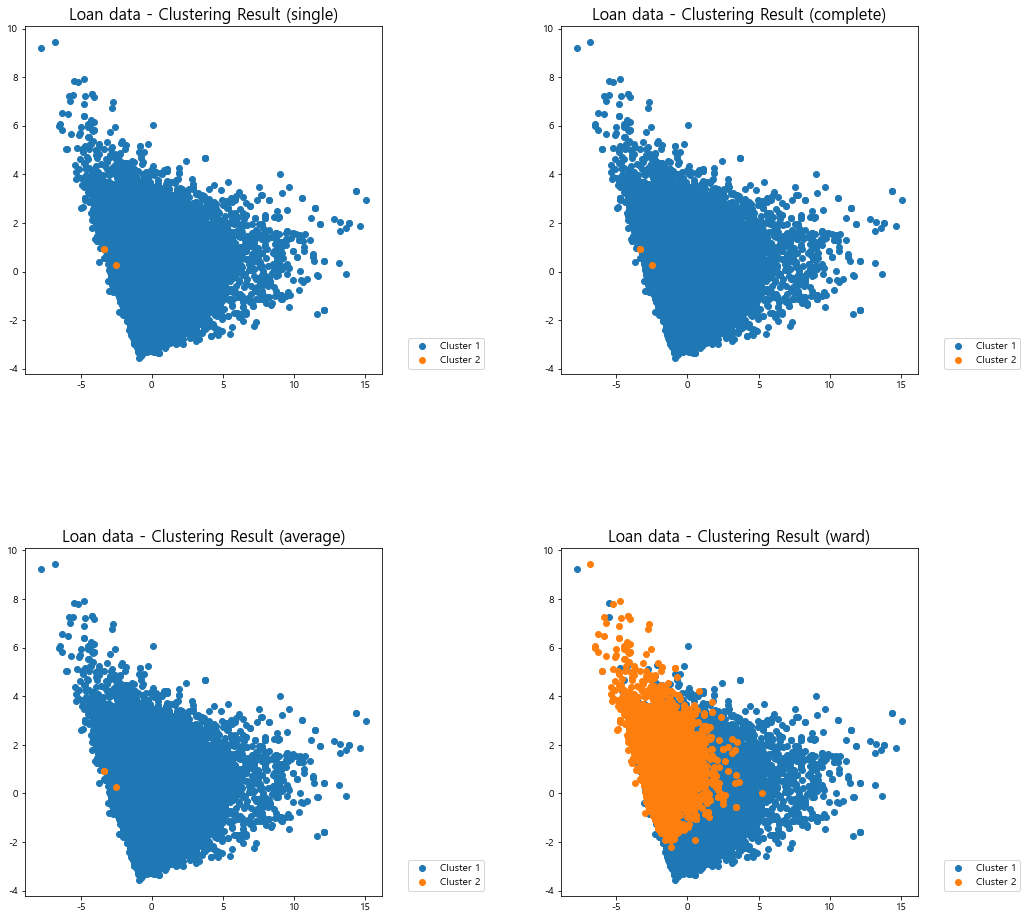

In [25]:
plt.figure(figsize=(16, 16))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _linkage in enumerate(linkage_list):
    plt.subplot(2, 2, i+1)
    plt.title('Loan data - Clustering Result ({})'.format(_linkage), fontsize=16)
    _results = cluster_results[_linkage]
    for c in np.unique(_results):
        plt.scatter(X_2[_results == c,0], X_2[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))
plt.show()

## 거리종류 변경

In [27]:
model = AgglomerativeClustering(
    linkage = 'single',  #여기를 위의 결과중 나은것을 대입하는걸로
    affinity = 'euclidean',
    distance_threshold=None,
    n_clusters=2)

distance_list = ['euclidean', 'manhattan','cosine']
cluster_results = {}
for _distance in distance_list:
    model.affinity = _distance
    _results = model.fit_predict(X)
    cluster_results[_distance] = _results

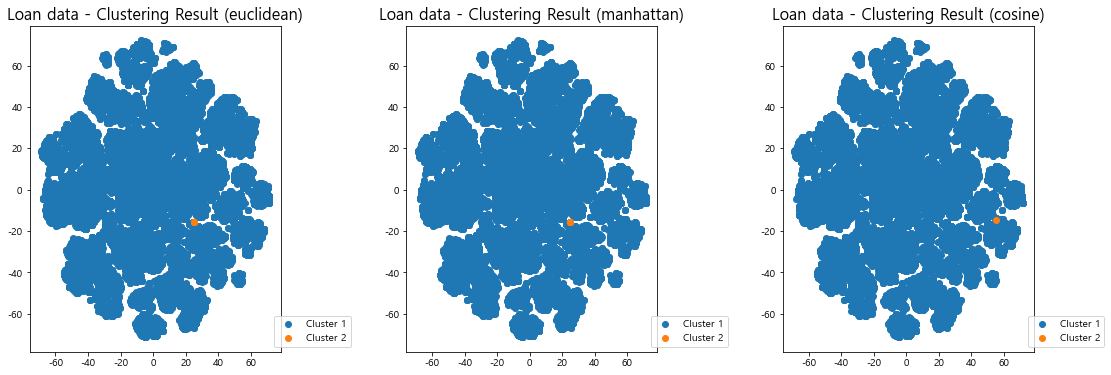

In [28]:
plt.figure(figsize=(18, 6))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _distance in enumerate(distance_list):
    plt.subplot(1, 3, i+1)
    plt.title('Loan data - Clustering Result ({})'.format(_distance), fontsize=16)
    _results = cluster_results[_distance]
    for c in np.unique(_results):
        plt.scatter(X_[_results == c,0], X_[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

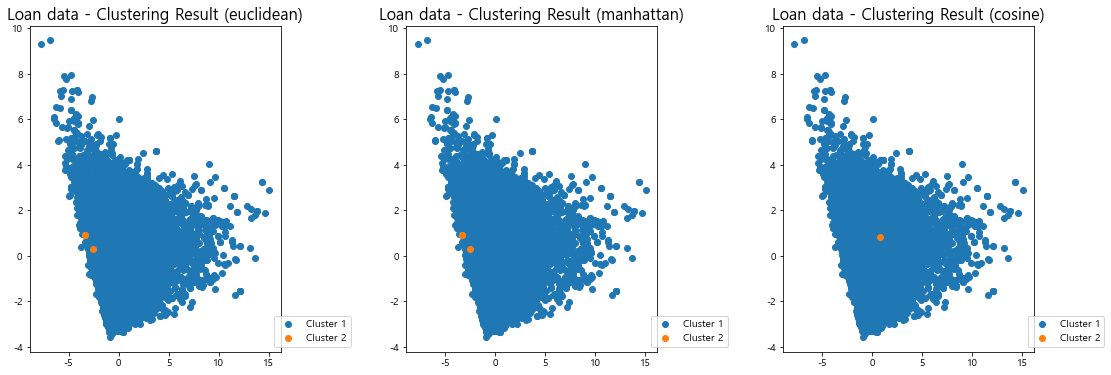

In [29]:
plt.figure(figsize=(18, 6))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _distance in enumerate(distance_list):
    plt.subplot(1, 3, i+1)
    plt.title('Loan data - Clustering Result ({})'.format(_distance), fontsize=16)
    _results = cluster_results[_distance]
    for c in np.unique(_results):
        plt.scatter(X_2[_results == c,0], X_2[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

# K-means

## K변경

### k여러개 동시에 - random seed 고정

In [30]:
model = KMeans(
    n_clusters = 2,
    init = 'k-means++',
    n_init = 1, 
    random_state = 0)

cluster_results = {}
for _n_clusters in np.arange(2, 14):
    model.n_clusters = _n_clusters
    cluster_results[_n_clusters] = model.fit_predict(X)

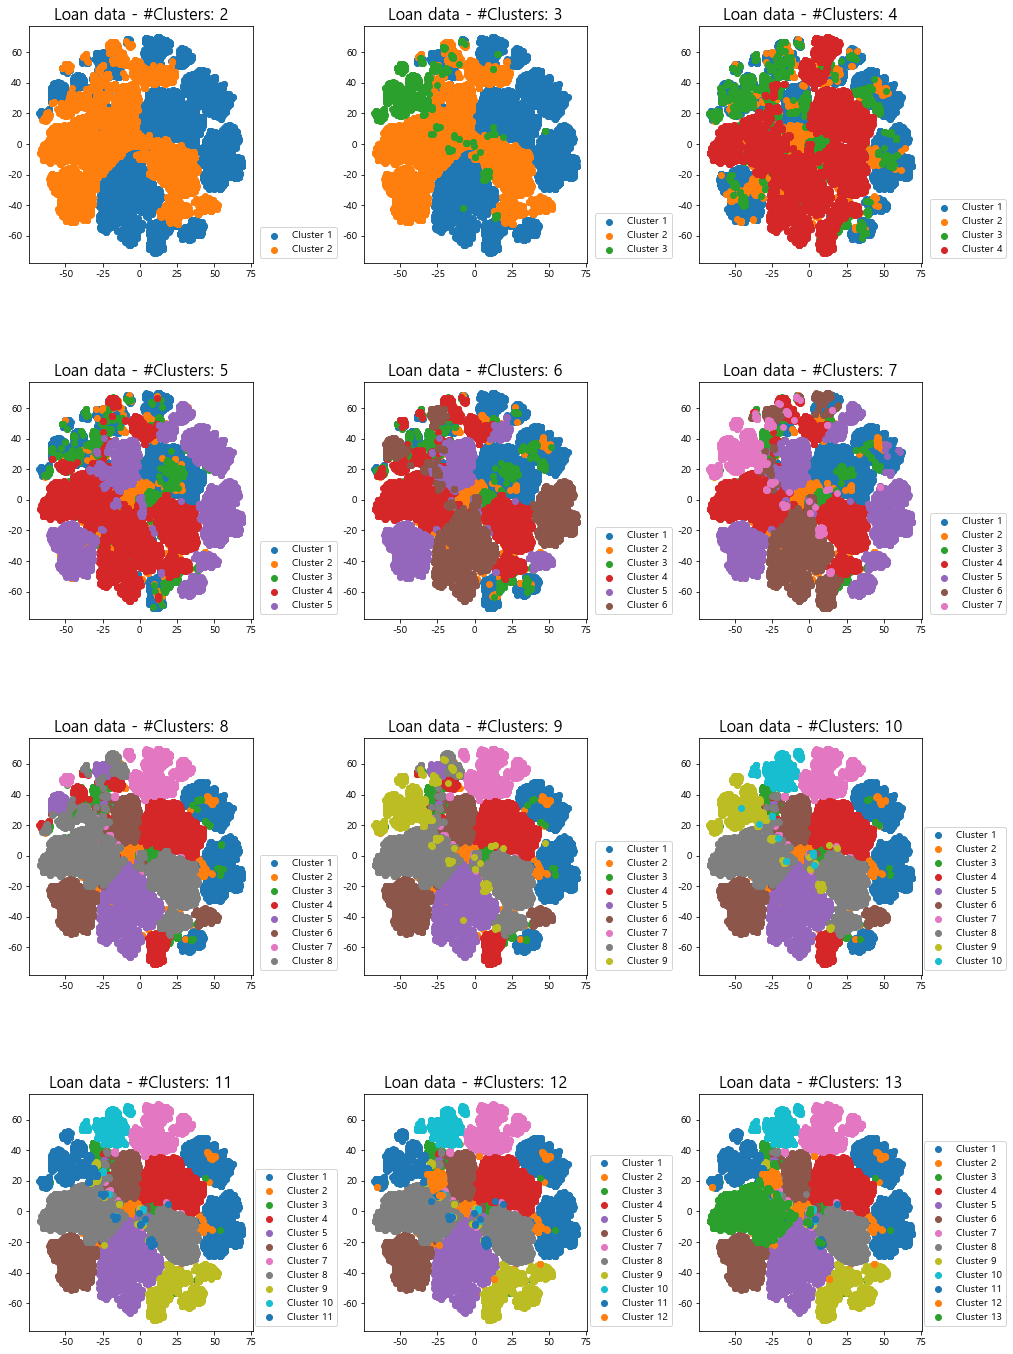

In [31]:
plt.figure(figsize=(16, 24))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _n_clusters in enumerate(np.arange(2, 14)):
    plt.subplot(4, 3, i+1)
    plt.title('Loan data - #Clusters: {}'.format(_n_clusters), fontsize=16)
    _results = cluster_results[_n_clusters]
    for c in np.unique(_results):
        plt.scatter(X_[_results == c,0], X_[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.4, 0.0))

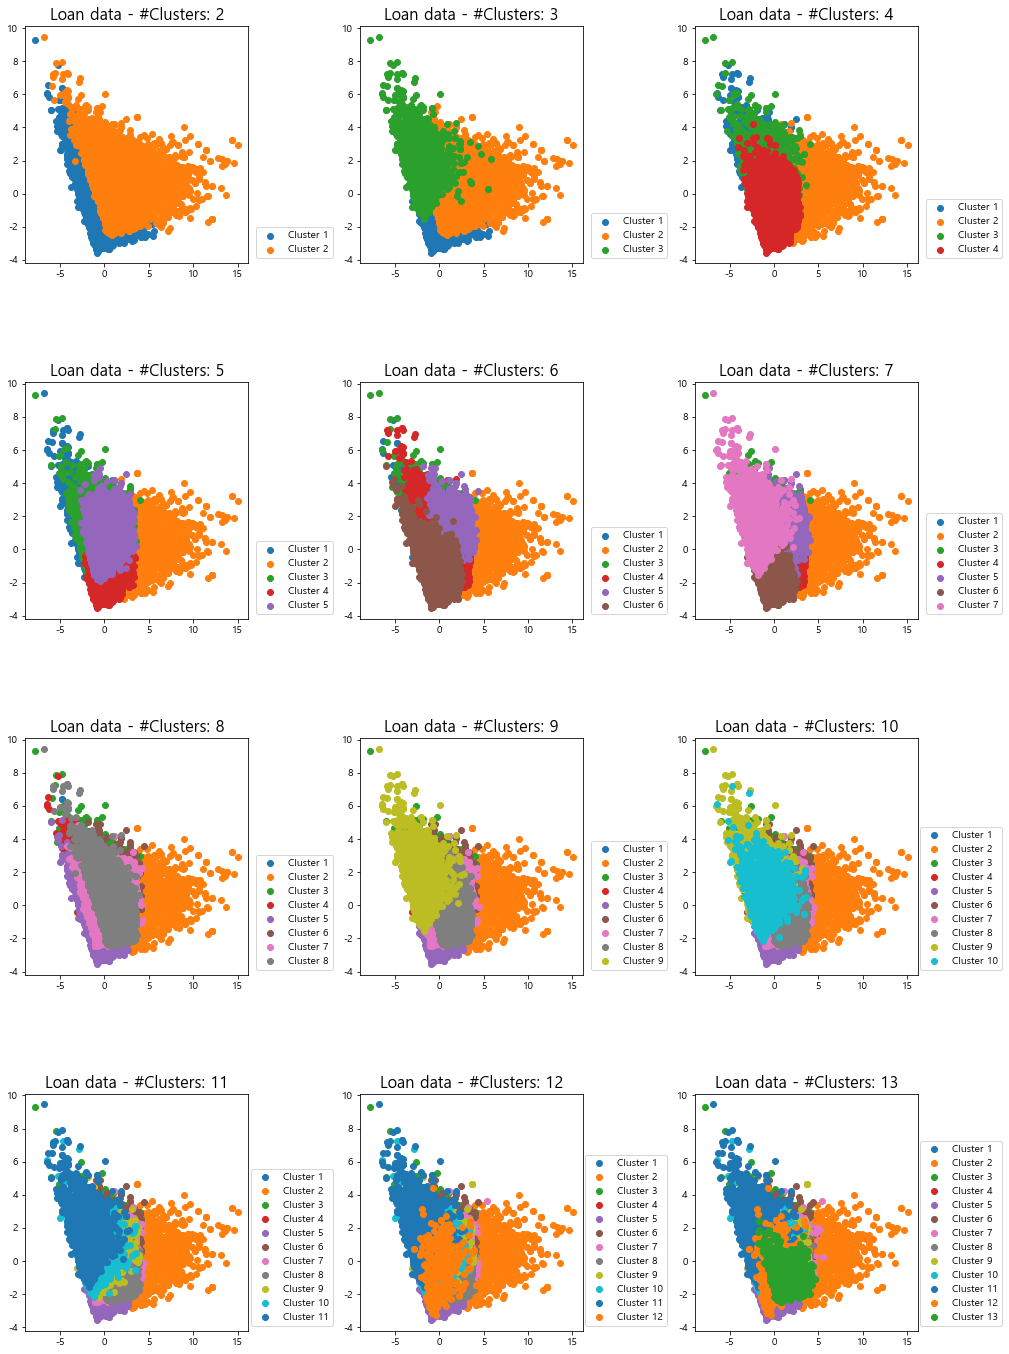

In [39]:
plt.figure(figsize=(16, 24))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _n_clusters in enumerate(np.arange(2, 14)):
    plt.subplot(4, 3, i+1)
    plt.title('Loan data - #Clusters: {}'.format(_n_clusters), fontsize=16)
    _results = cluster_results[_n_clusters]
    for c in np.unique(_results):
        plt.scatter(X_2[_results == c,0], X_2[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.4, 0.0))

### k여러개 각자 - random seed 함께

In [40]:
#k=2
# 모델 정의 
model = KMeans(
    n_clusters = 2,
    init = 'random',
    n_init = 1)

random_seeds = np.arange(250, 310, 10)
cluster_results = {}
# 학습
for _seed in random_seeds:
    model.random_state = _seed
    _results = model.fit_predict(X)
    cluster_results[_seed] = _results

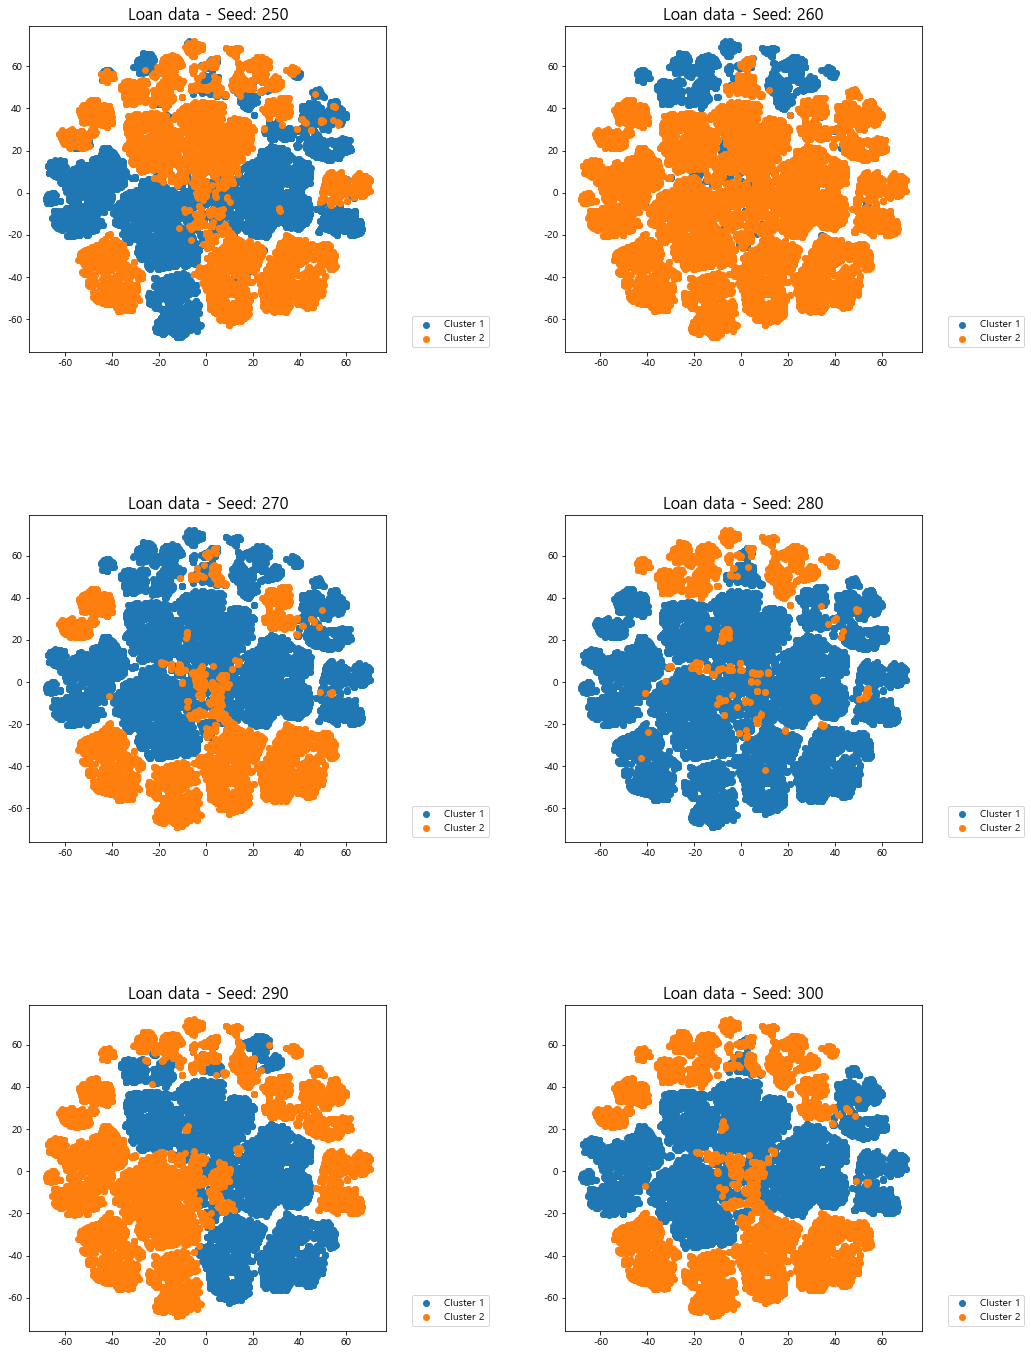

In [41]:
# 군집 형성 시각화
plt.figure(figsize=(16, 24))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _seed in enumerate(random_seeds):
    plt.subplot(3, 2, i+1)
    plt.title('Loan data - Seed: {}'.format(_seed), fontsize=16)
    _results = cluster_results[_seed]
    for c in np.unique(_results):
        plt.scatter(X_[_results == c,0], X_[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

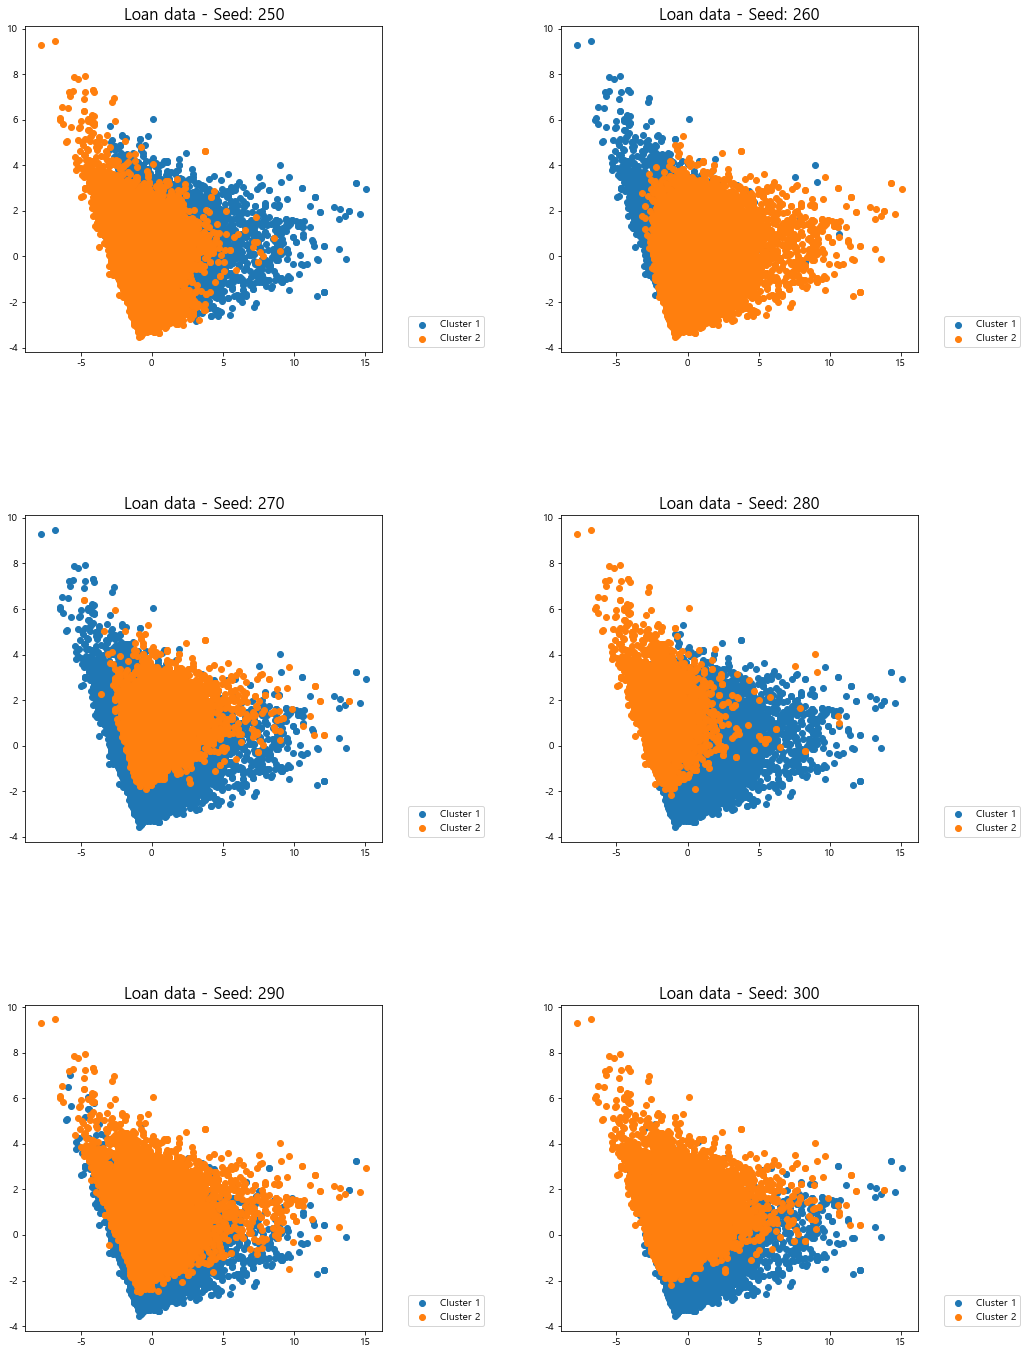

In [42]:
plt.figure(figsize=(16, 24))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _seed in enumerate(random_seeds):
    plt.subplot(3, 2, i+1)
    plt.title('Loan data - Seed: {}'.format(_seed), fontsize=16)
    _results = cluster_results[_seed]
    for c in np.unique(_results):
        plt.scatter(X_2[_results == c,0], X_2[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

In [43]:
#k=10
# 모델 정의 
model = KMeans(
    n_clusters = 10,
    init = 'random',
    n_init = 1)

random_seeds = np.arange(250, 310, 10)
cluster_results = {}
# 학습
for _seed in random_seeds:
    model.random_state = _seed
    _results = model.fit_predict(X)
    cluster_results[_seed] = _results

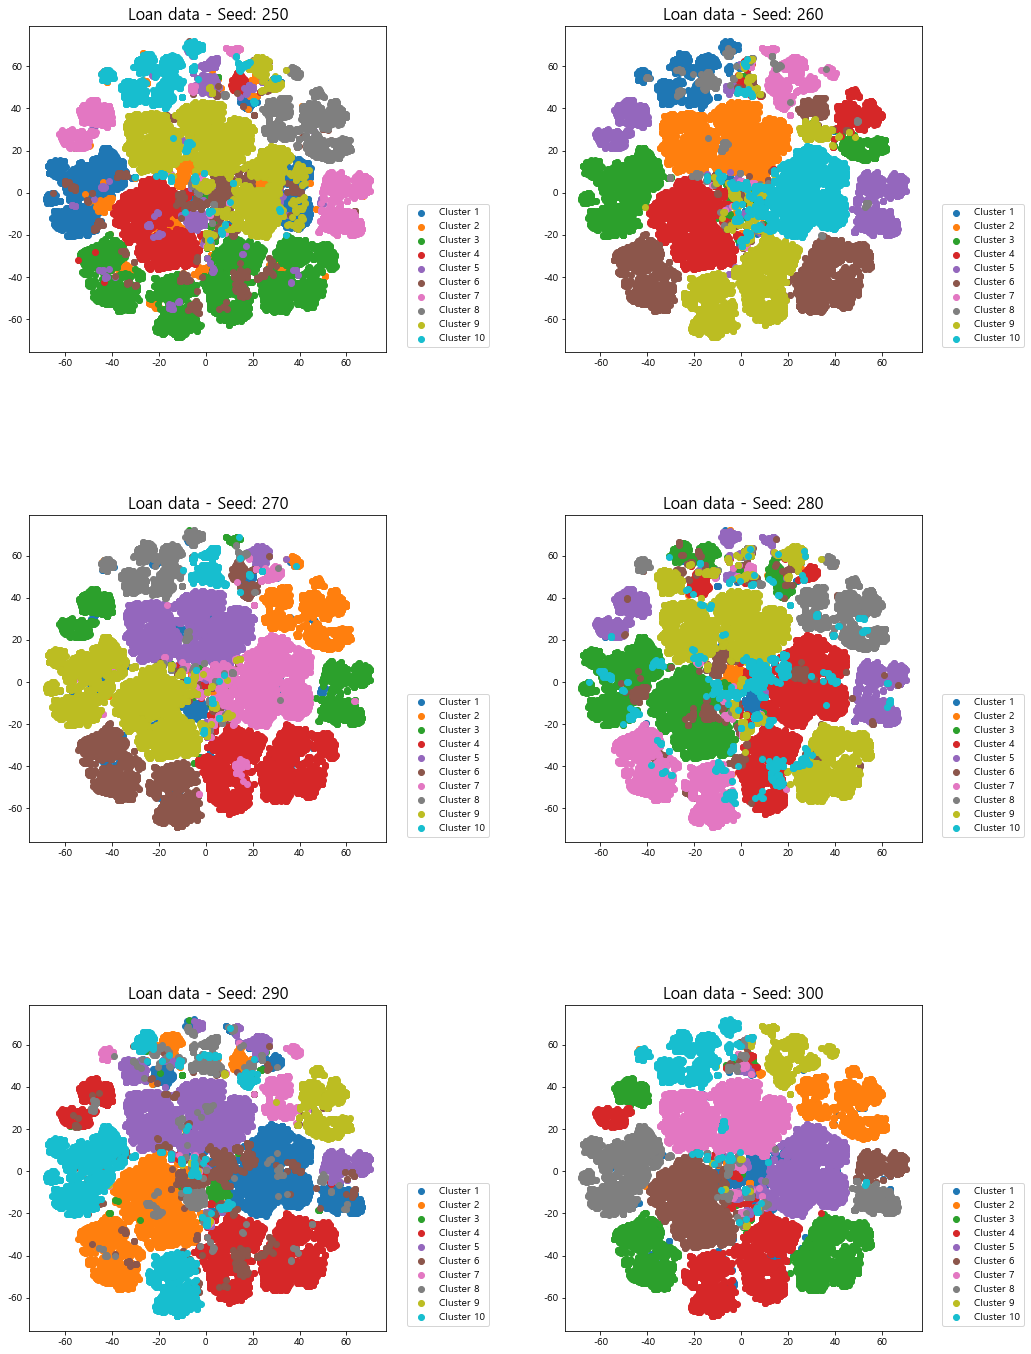

In [44]:
# 군집 형성 시각화
plt.figure(figsize=(16, 24))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _seed in enumerate(random_seeds):
    plt.subplot(3, 2, i+1)
    plt.title('Loan data - Seed: {}'.format(_seed), fontsize=16)
    _results = cluster_results[_seed]
    for c in np.unique(_results):
        plt.scatter(X_[_results == c,0], X_[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

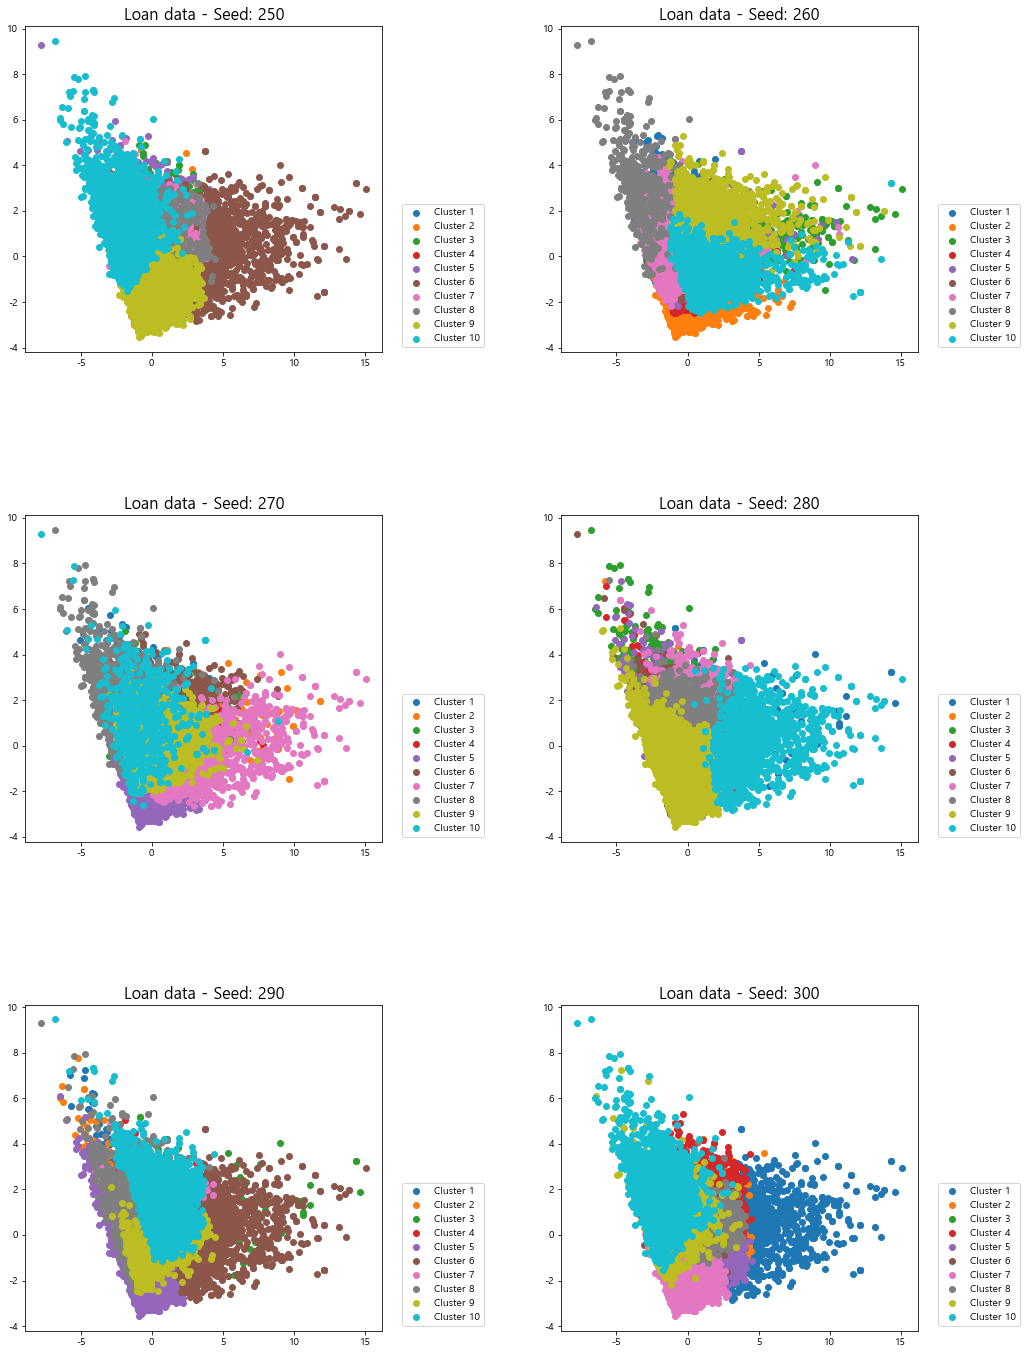

In [45]:
plt.figure(figsize=(16, 24))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _seed in enumerate(random_seeds):
    plt.subplot(3, 2, i+1)
    plt.title('Loan data - Seed: {}'.format(_seed), fontsize=16)
    _results = cluster_results[_seed]
    for c in np.unique(_results):
        plt.scatter(X_2[_results == c,0], X_2[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

## n_init 증가 확인 + with random seeds

In [46]:
#n_init = 3
model = KMeans(
    n_clusters = 2,
    init = 'random',
    n_init = 3)

random_seeds = np.arange(250, 310, 10)
cluster_results = {}
# 학습
for _seed in random_seeds:
    model.random_state = _seed
    _results = model.fit_predict(X)
    cluster_results[_seed] = _results

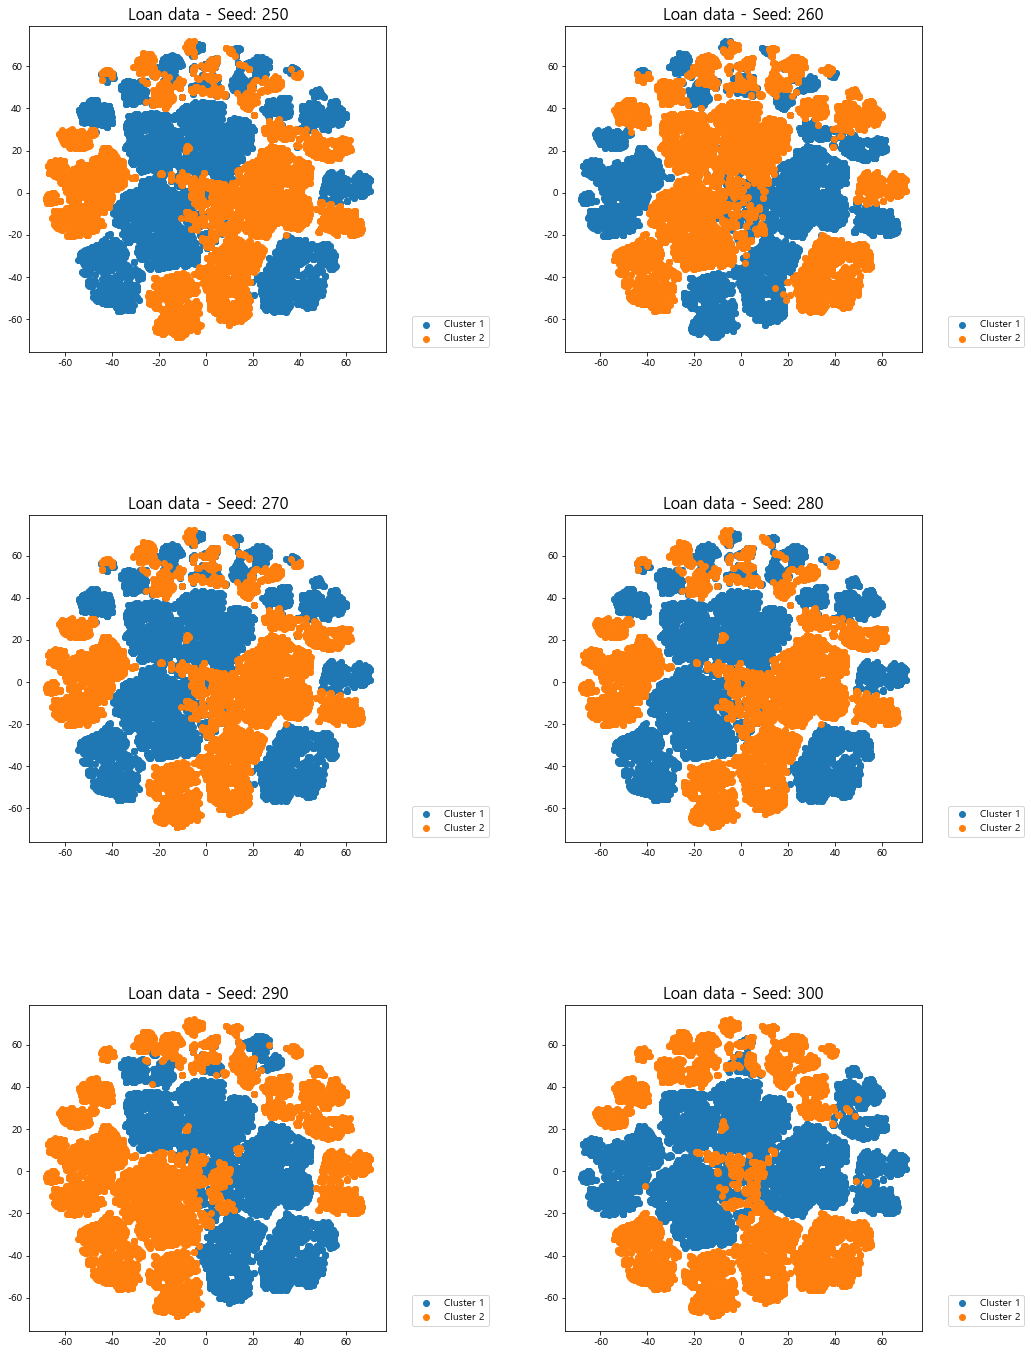

In [47]:
# 군집 형성 시각화
plt.figure(figsize=(16, 24))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _seed in enumerate(random_seeds):
    plt.subplot(3, 2, i+1)
    plt.title('Loan data - Seed: {}'.format(_seed), fontsize=16)
    _results = cluster_results[_seed]
    for c in np.unique(_results):
        plt.scatter(X_[_results == c,0], X_[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

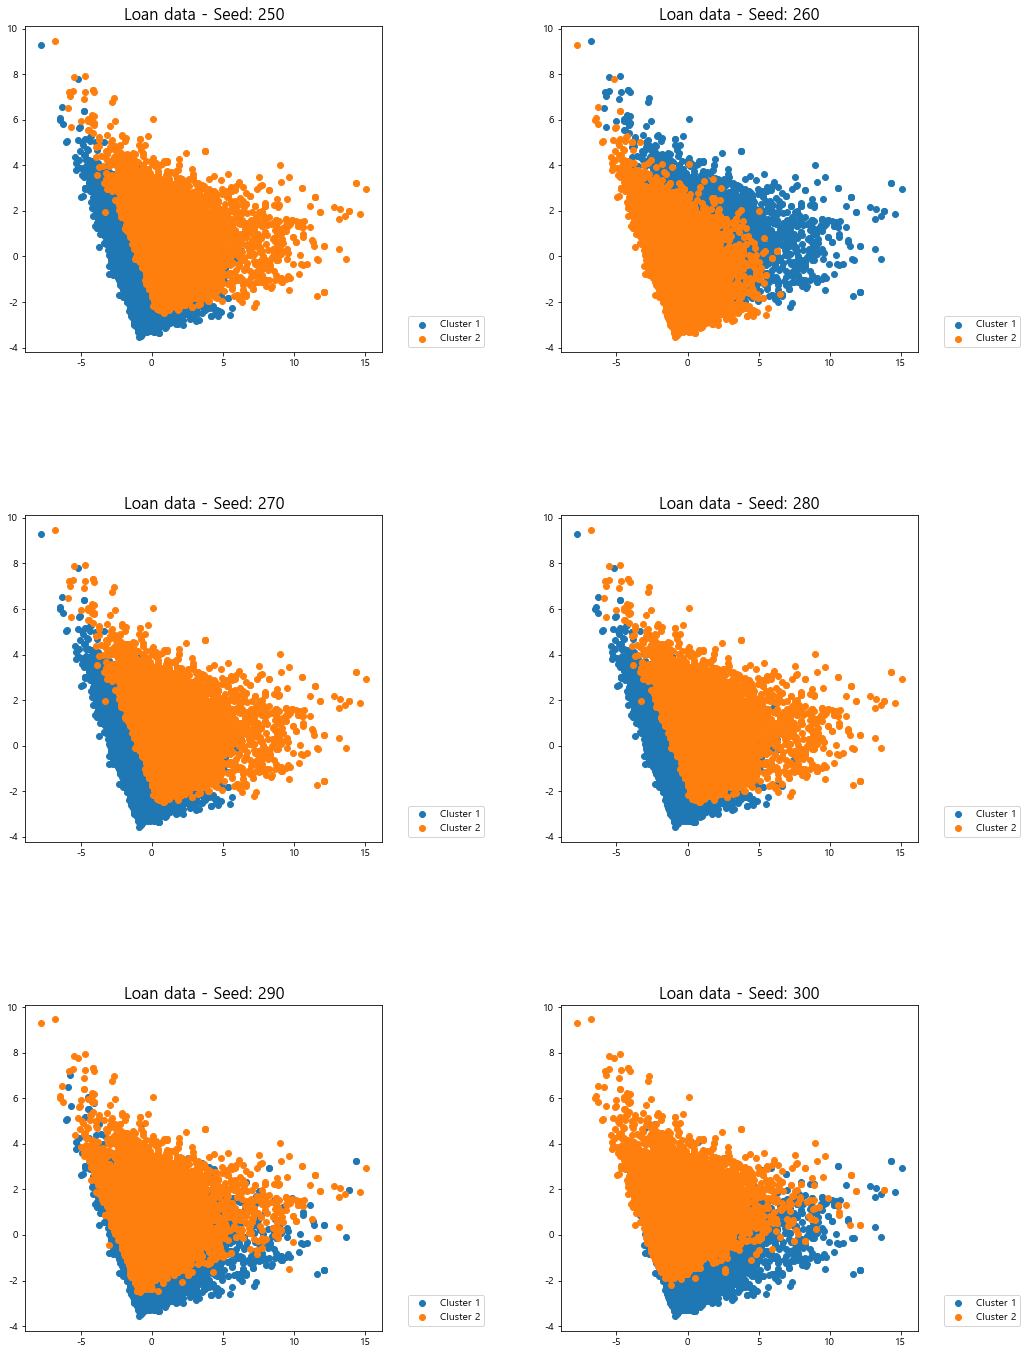

In [48]:
plt.figure(figsize=(16, 24))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _seed in enumerate(random_seeds):
    plt.subplot(3, 2, i+1)
    plt.title('Loan data - Seed: {}'.format(_seed), fontsize=16)
    _results = cluster_results[_seed]
    for c in np.unique(_results):
        plt.scatter(X_2[_results == c,0], X_2[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

In [49]:
#n_init = 10
model = KMeans(
    n_clusters = 2,
    init = 'random',
    n_init = 10)

random_seeds = np.arange(250, 310, 10)
cluster_results = {}
# 학습
for _seed in random_seeds:
    model.random_state = _seed
    _results = model.fit_predict(X)
    cluster_results[_seed] = _results

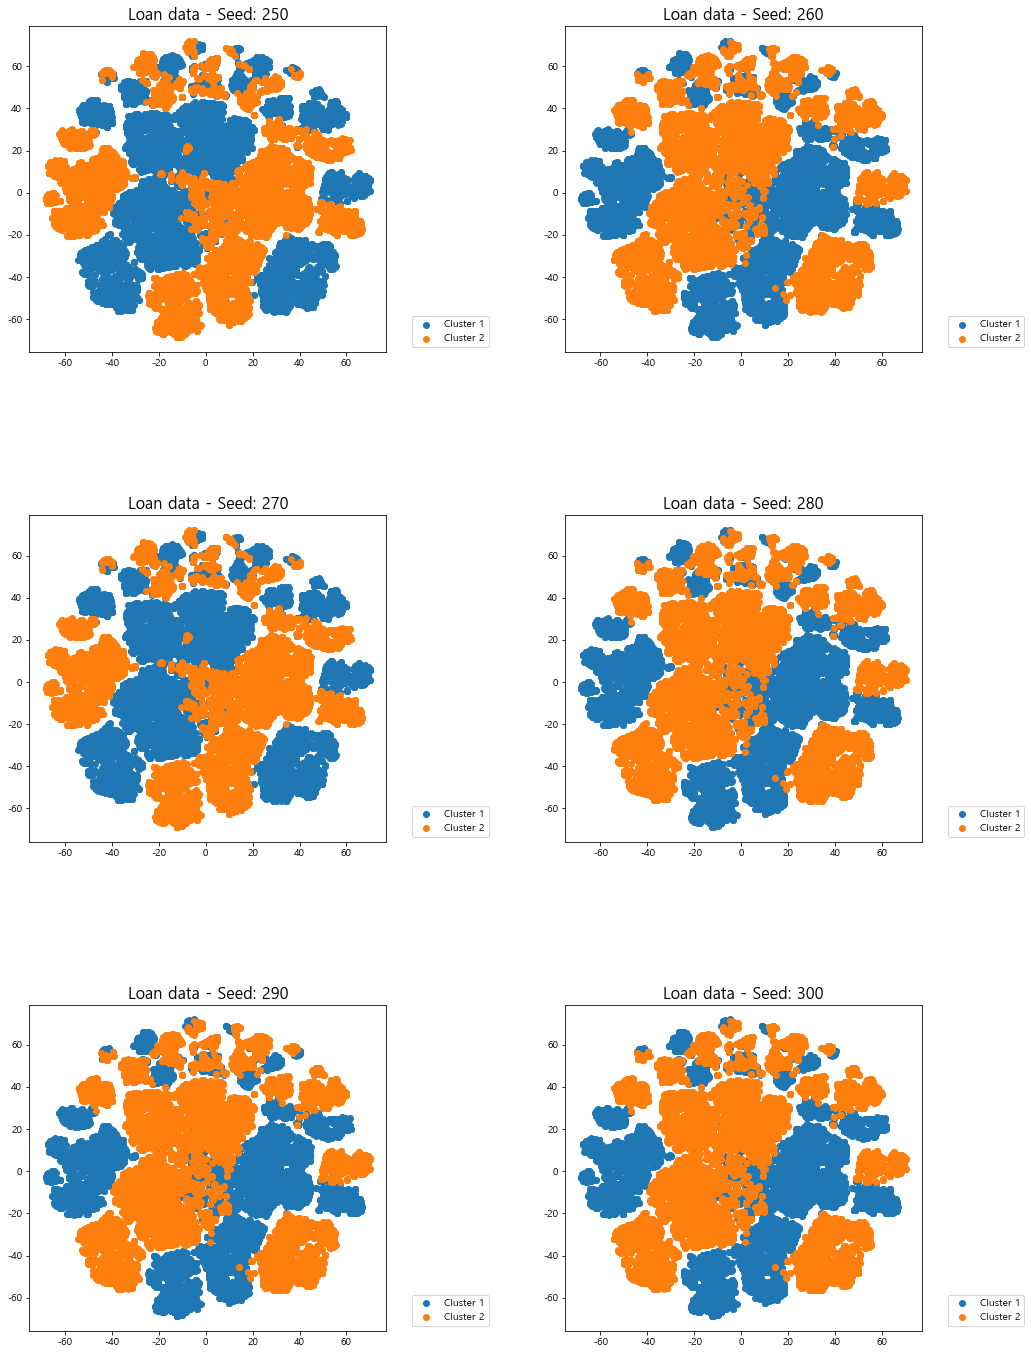

In [50]:
# 군집 형성 시각화
plt.figure(figsize=(16, 24))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _seed in enumerate(random_seeds):
    plt.subplot(3, 2, i+1)
    plt.title('Loan data - Seed: {}'.format(_seed), fontsize=16)
    _results = cluster_results[_seed]
    for c in np.unique(_results):
        plt.scatter(X_[_results == c,0], X_[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

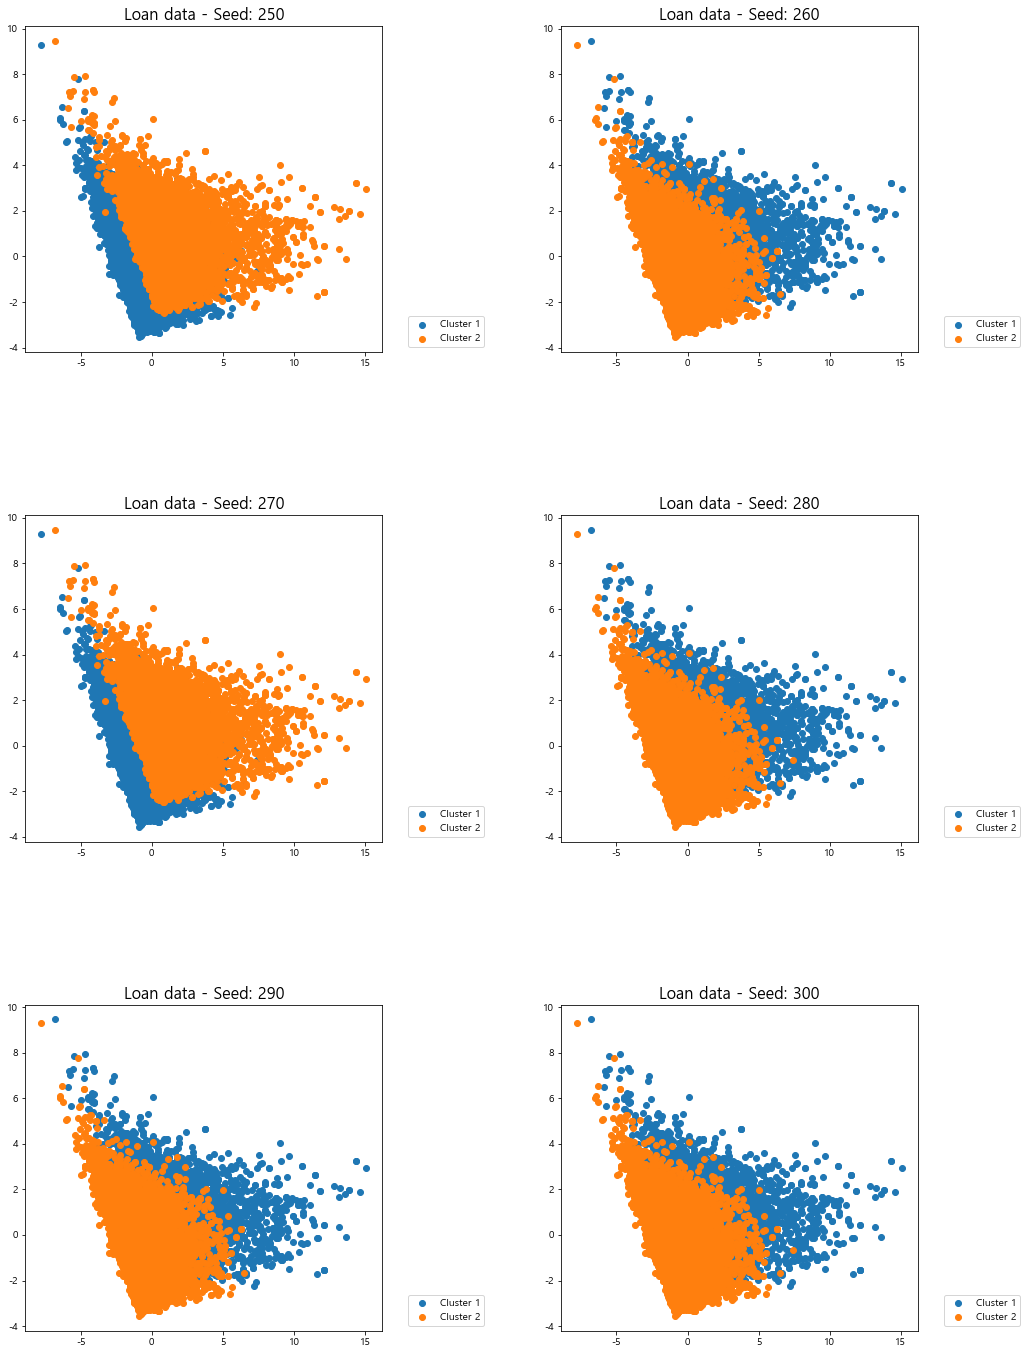

In [51]:
plt.figure(figsize=(16, 24))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _seed in enumerate(random_seeds):
    plt.subplot(3, 2, i+1)
    plt.title('Loan data - Seed: {}'.format(_seed), fontsize=16)
    _results = cluster_results[_seed]
    for c in np.unique(_results):
        plt.scatter(X_2[_results == c,0], X_2[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

## init변경 k-mean++

In [52]:
#n_init = 10
model = KMeans(
    n_clusters = 2,
    init = 'k-means++',
    n_init = 1)

random_seeds = np.arange(250, 310, 10)
cluster_results = {}
# 학습
for _seed in random_seeds:
    model.random_state = _seed
    _results = model.fit_predict(X)
    cluster_results[_seed] = _results

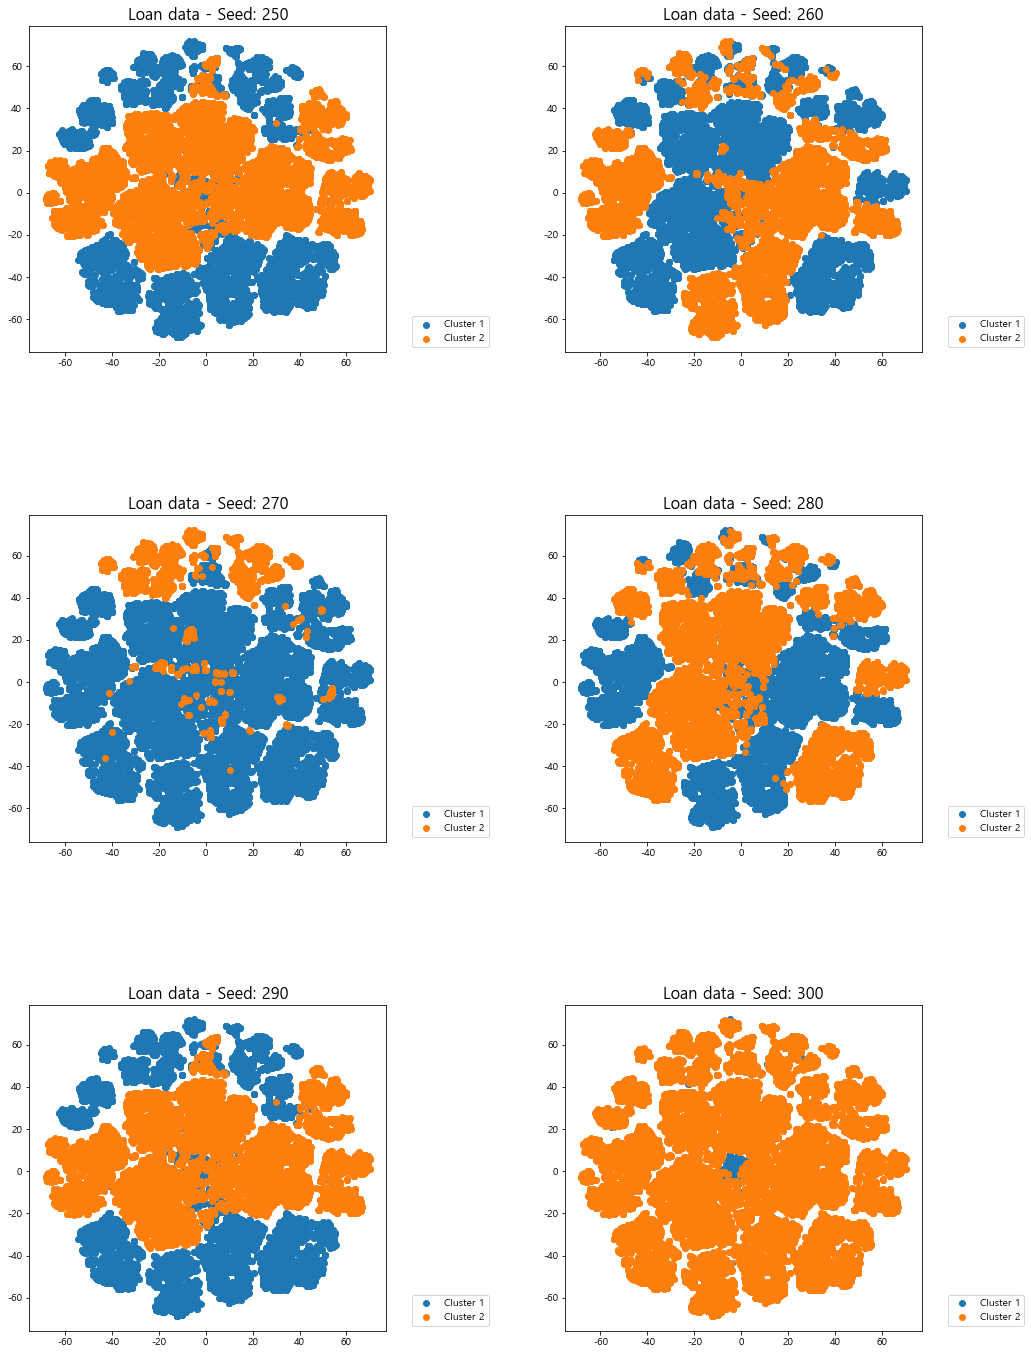

In [53]:
# 군집 형성 시각화
plt.figure(figsize=(16, 24))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _seed in enumerate(random_seeds):
    plt.subplot(3, 2, i+1)
    plt.title('Loan data - Seed: {}'.format(_seed), fontsize=16)
    _results = cluster_results[_seed]
    for c in np.unique(_results):
        plt.scatter(X_[_results == c,0], X_[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

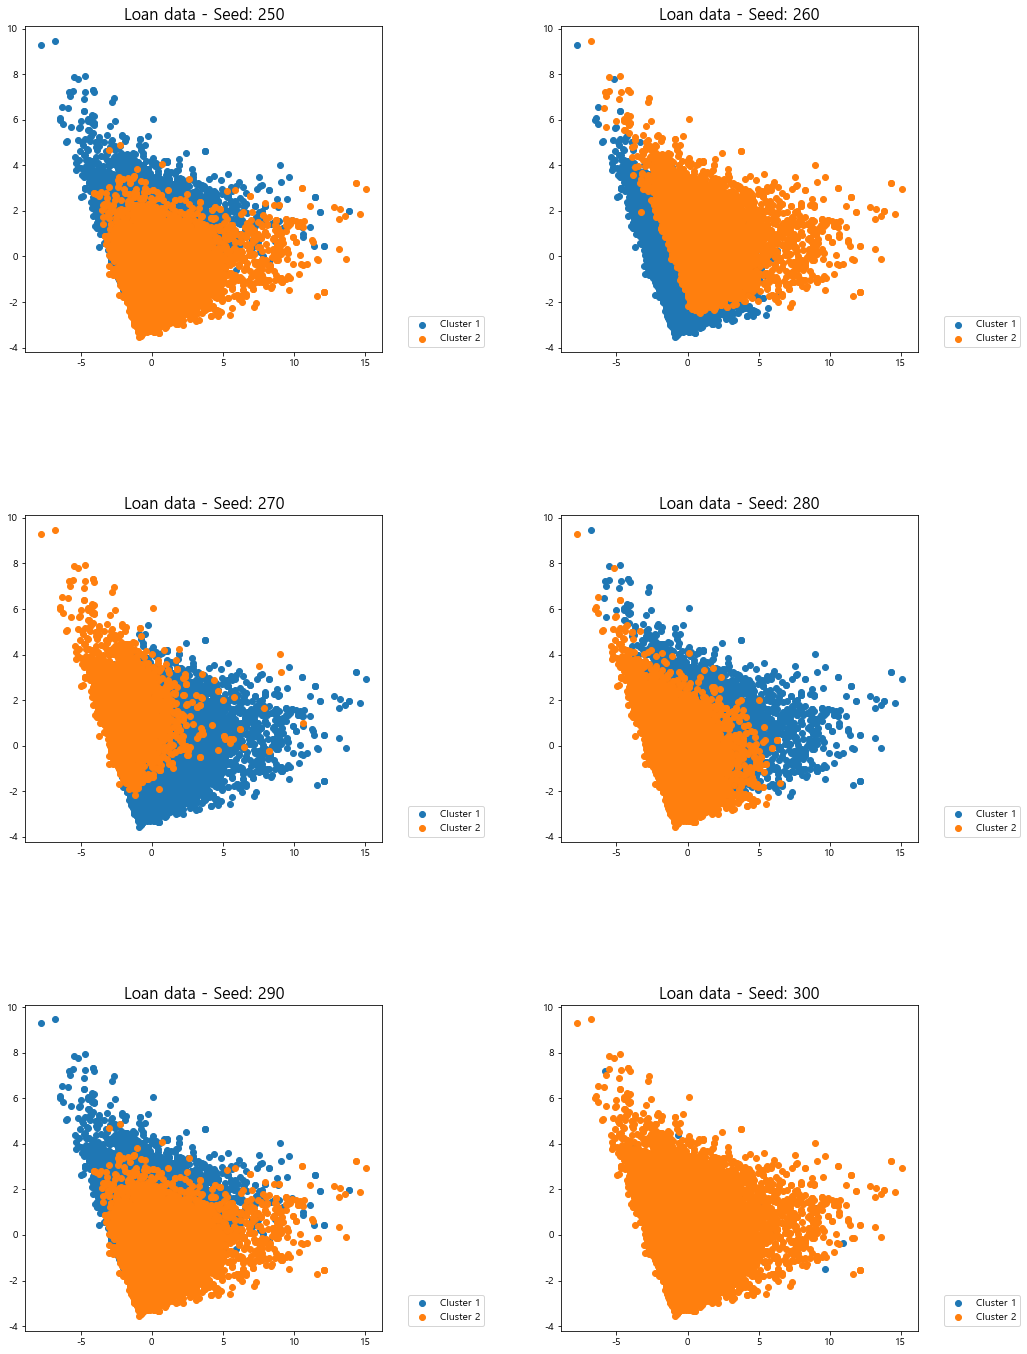

In [54]:
plt.figure(figsize=(16, 24))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for i, _seed in enumerate(random_seeds):
    plt.subplot(3, 2, i+1)
    plt.title('Loan data - Seed: {}'.format(_seed), fontsize=16)
    _results = cluster_results[_seed]
    for c in np.unique(_results):
        plt.scatter(X_2[_results == c,0], X_2[_results == c,1], label='Cluster {}'.format(c+1))
    plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

# 데이터의 실제 Y값과 cluster비교해보기

In [55]:
# 모델 정의 
model = KMeans(
    n_clusters = 2,
    init = 'k-means++',
    n_init = 3,
    random_state = 0)

# 학습
opti_clusters = model.fit_predict(X)

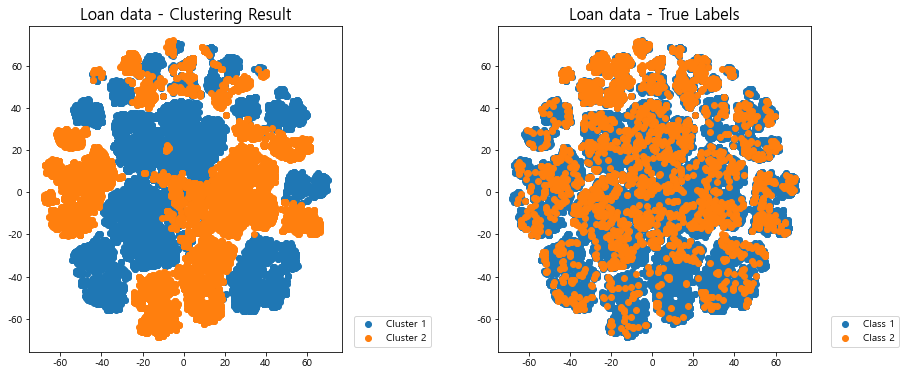

In [56]:
# 군집 형성 시각화
plt.figure(figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
plt.title('Loan data - Clustering Result', fontsize=16)
for c in np.unique(opti_clusters):
    plt.scatter(X_[opti_clusters == c,0], X_[opti_clusters == c,1], label='Cluster {}'.format(c+1))
plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

plt.subplot(1, 2, 2)
plt.title('Loan data - True Labels', fontsize=16)
for c in np.unique(y):
    plt.scatter(X_[y == c,0], X_[y == c,1], label='Class {}'.format(c+1))
plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

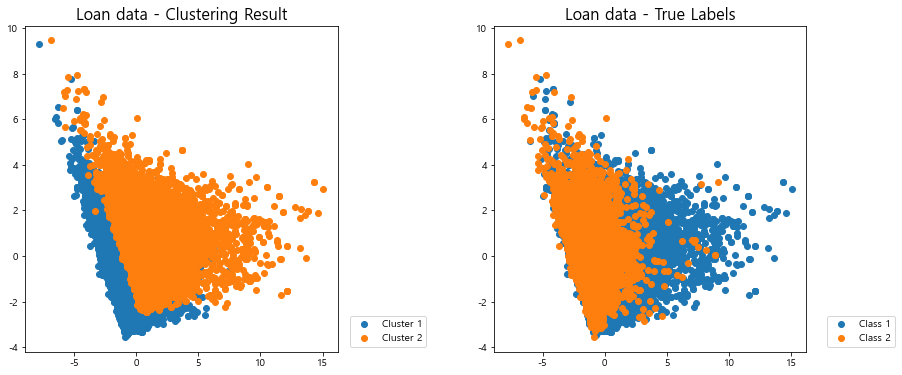

In [58]:
# 군집 형성 시각화
plt.figure(figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
plt.title('Loan data - Clustering Result', fontsize=16)
for c in np.unique(opti_clusters):
    plt.scatter(X_2[opti_clusters == c,0], X_2[opti_clusters == c,1], label='Cluster {}'.format(c+1))
plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

plt.subplot(1, 2, 2)
plt.title('Loan data - True Labels', fontsize=16)
for c in np.unique(y):
    plt.scatter(X_2[y == c,0], X_2[y == c,1], label='Class {}'.format(c+1))
plt.legend(loc=4, bbox_to_anchor=(1.3, 0.0))

# silhourtte 실루렛 기법

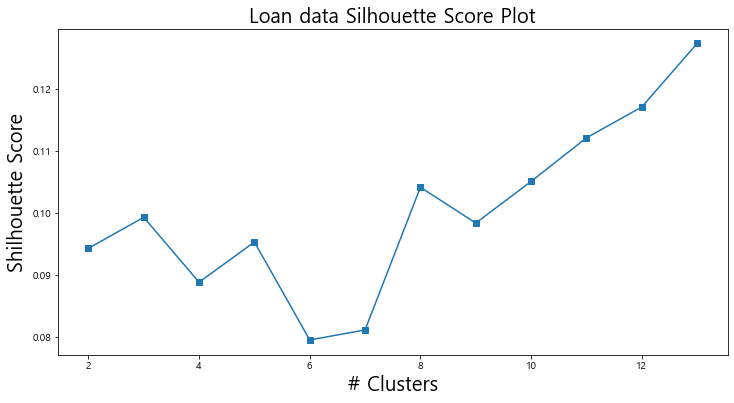

In [59]:
model = KMeans(
    n_clusters = 2,
    init = 'k-means++',
    n_init = 3, 
    random_state = 0)

scores = []
cluster_results = {}
for _n_clusters in np.arange(2, 14):
    model.n_clusters = _n_clusters
    cluster_results[_n_clusters] = model.fit_predict(X)
    scores.append(silhouette_score(X, model.labels_))
    
plt.figure(figsize=(12, 6))
plt.title('Loan data Silhouette Score Plot', fontsize=20)
plt.xlabel('# Clusters', fontsize=20)
plt.ylabel('Shilhouette Score', fontsize=20)
plt.plot(np.arange(2, 14), scores, marker='s')
plt.show()

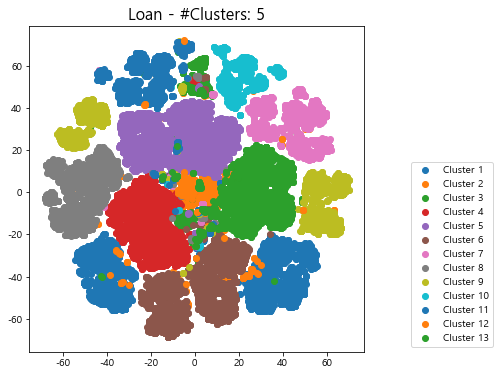

In [64]:
plt.figure(figsize=(6, 6))
plt.title('Loan - #Clusters: {}'.format(5), fontsize=16)
_results = cluster_results[13] #여기를 조작해
for c in np.unique(_results):
    plt.scatter(X_[_results == c,0], X_[_results == c,1], label='Cluster {}'.format(c+1))
plt.legend(loc=4, bbox_to_anchor=(1.4, 0.0))
plt.show()

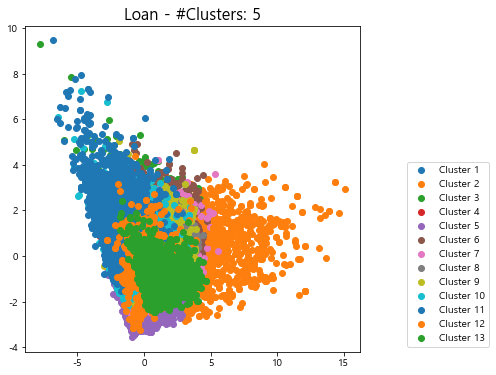

In [65]:
plt.figure(figsize=(6, 6))
plt.title('Loan - #Clusters: {}'.format(5), fontsize=16)
_results = cluster_results[13] #여기를 조작해
for c in np.unique(_results):
    plt.scatter(X_2[_results == c,0], X_2[_results == c,1], label='Cluster {}'.format(c+1))
plt.legend(loc=4, bbox_to_anchor=(1.4, 0.0))
plt.show()

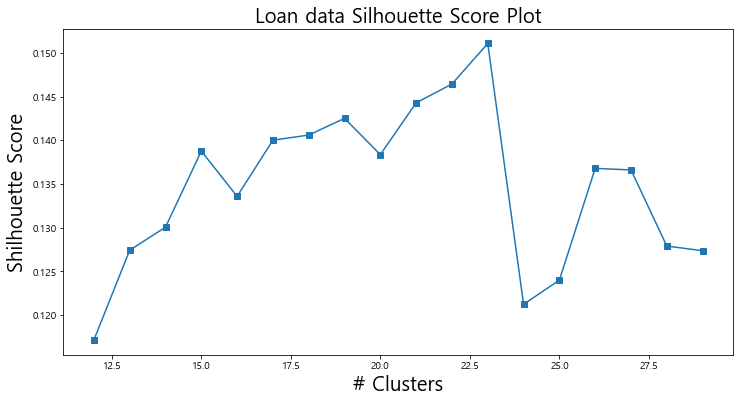

In [67]:
model = KMeans(
    n_clusters = 2,
    init = 'k-means++',
    n_init = 3, 
    random_state = 0)

scores = []
cluster_results = {}
for _n_clusters in np.arange(12, 30):
    model.n_clusters = _n_clusters
    cluster_results[_n_clusters] = model.fit_predict(X)
    scores.append(silhouette_score(X, model.labels_))
    
plt.figure(figsize=(12, 6))
plt.title('Loan data Silhouette Score Plot', fontsize=20)
plt.xlabel('# Clusters', fontsize=20)
plt.ylabel('Shilhouette Score', fontsize=20)
plt.plot(np.arange(12, 30), scores, marker='s')
plt.show()

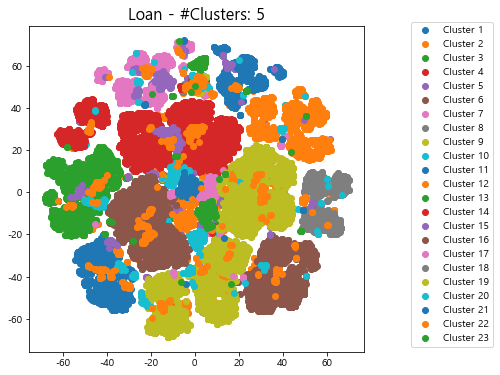

In [68]:
plt.figure(figsize=(6, 6))
plt.title('Loan - #Clusters: {}'.format(5), fontsize=16)
_results = cluster_results[23] #여기를 조작해
for c in np.unique(_results):
    plt.scatter(X_[_results == c,0], X_[_results == c,1], label='Cluster {}'.format(c+1))
plt.legend(loc=4, bbox_to_anchor=(1.4, 0.0))
plt.show()

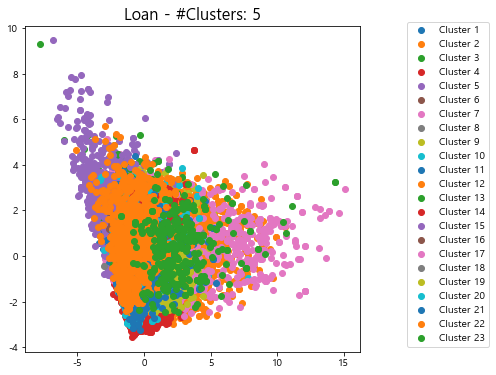

In [69]:
plt.figure(figsize=(6, 6))
plt.title('Loan - #Clusters: {}'.format(5), fontsize=16)
_results = cluster_results[23] #여기를 조작해
for c in np.unique(_results):
    plt.scatter(X_2[_results == c,0], X_2[_results == c,1], label='Cluster {}'.format(c+1))
plt.legend(loc=4, bbox_to_anchor=(1.4, 0.0))
plt.show()

1. 변수를 제외시키거나, hw2 로지스틱 중요변수 몇개만 넣고 해보기
2. 아니면 애초에 target이 2개라고 2개로 군집화하려는게 문제.= 소비자는 훨씬 더다양한 군집으로 구성, 그 중 비슷한 군집이 아닌 전혀달라보이는 군집들을 묶어서 대출여부 결정될수도 있음
예를들어 고학력 고소득인 군집과 자녀많은 군집은 다른 놈들이지만 대출을 받을 수 있다는 결론이 나올 수 있다. 그렇다면 target에 맞추는 것이 무의미할지도 모른다.

전처리 다시해보자.